In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sympathy

In [2]:
def act(x):
    return 0 if x<0.5 else 1

def go(house, rock, attractive):
    x = np.array([house, rock, attractive])
    w11 = [0.3, 0.3, 0]
    w12 = [0.4, -0.5, 1]
    weight1 = np.array([w11, w12])
    weight2 = np.array([-1, 1])

    sum_hidden = np.dot(weight1, x)
    print("Hidenn layer neuron sum: ", str(sum_hidden))

    out_hidden = np.array([act(x) for x in sum_hidden])
    print("Exits values from hiden neuron: ", str(out_hidden))

    sum_end = np.dot(weight2, out_hidden)
    y = act(sum_end)
    print("Exit values NN: ", str(y))
    return y

house = 1
rock = 0
attr = 1
res = go(house, rock, attr)
if res == 1:
    print("I'l like you")
else:
    print("I'l call")

Hidenn layer neuron sum:  [0.3 1.4]
Exits values from hiden neuron:  [0 1]
Exit values NN:  1
I'l like you


# simple classification

Class C1
Class C1
Class C1
Class C1
Class C1


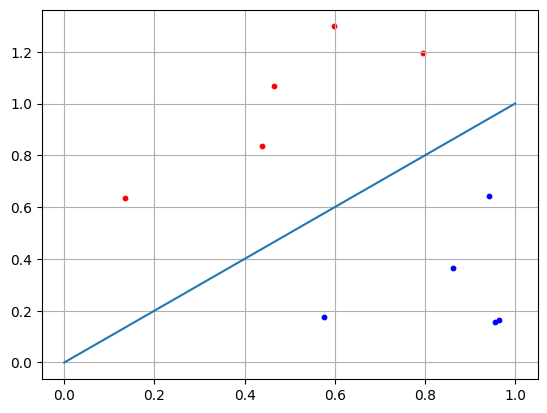

In [3]:
N = 5
x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)]
C1 = [x1, x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1
C2 = [x1, x2]

f = [0, 1]

w = np.array([-0.3, 0.3])
for i in range(N):
    x = np.array([C1[0][i], C1[1][i]])
    y = np.dot(w, x)
    if y >= 0:
        print("Class C1")
    else:
        print("Class C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

# back propogation

In [3]:
def f(x):
    # функция для вычисления гиперболического тангенса
    return 2/(1 + np.exp(-x)) - 1

def df(x):
    # функция для вычисления производной
    return 0.5*(1+x)*(1-x)

# Инициализированные веса для нейронной сети
W1 = np.array(([-0.2, 0.3, -0.4], [0.1, -0.3, -0.4]))
W2 = np.array([0.2, 0.3])

def go_forward(inp):
    sum = np.dot(W1, inp)
    out = np.array([f(x) for x in sum])

    sum = np.dot(W2, out)
    y = f(sum)
    return (y, out)

def train(epoch):
    global W2, W1
    lmd = 0.01 # learning step
    N = 10000 # number of iterations during learning
    count = len(epoch)
    for k in range(N):
        x = epoch[np.random.randint(0, count)] # input signal random from learning data
        y, out = go_forward(x[0:3]) # прямой проход по НС и вычисление выходных значений нейрона
        e = y - x[-1]   # Ошибка
        delta = e*df(y) # local gradient
        W2[0] = W2[0] - lmd * delta * out[0]    # корректировка веса первой связи
        W2[1] = W2[1] - lmd * delta * out[1]    # корректировка веса второй связи

        delta2 = W2*delta*df(out) # вектор из 2-х величин локальных градиентов

        # корректировка связей первого слоя
        W1[0, :] = W1[0, :] - np.array(x[0:3]) * delta2[0] * lmd
        W1[1, :] = W1[1, :] - np.array(x[0:3]) * delta2[1] * lmd

# обучающая выборка
epoch = [(-1,-1,-1,-1),
         (-1,-1,1,1),
         (-1,1,-1,-1),
         (-1,1,1,1),
         (1,-1,-1,-1),
         (1,-1, 1, 1),
         (1, 1, -1, -1),
         (1, 1, 1, -1)] 

train(epoch) # запуск обучения сети
# проверка полученных результатов
for x in epoch:
    y, out = go_forward(x[0:3])
    print(f"{y} => {x[-1]}")

0.061027487342898645 => -1
0.9282008832349158 => 1
-0.8703417666195992 => -1
0.8719862227129065 => 1
-0.8719862227129064 => -1
0.8703417666195992 => 1
-0.9282008832349158 => -1
-0.061027487342898645 => -1
